# Pandas bevezető

Ez a bevezető az Üzleti Intelligencia tárgy laborjához készült. A pandas könyvtárhoz kívánok egy rövid bevezetőt nyújtani. Az anyag folyamatosan bővül.

Angol nyelven kiváló erőforrásokat találhatsz:

1. A hivatalos dokumentációhoz tartozó rövid bevezető: http://pandas.pydata.org/pandas-docs/stable/10min.html
2. Brandon Rhodes tutorialja a 2015-ös Pyconon (kicsit hosszabb, de megéri): https://www.youtube.com/watch?v=5JnMutdy6Fw

# Mi az a pandas?

A pandas egy adatkezelő függvénykönyvtár, amit a Data Scientistek nagyon szeretnek. Az adatokat táblázatos formában kezeli. A táblázatoknak van fejlécük és indexük. Heterogén adatokat tárolhatunk: szöveges, számadat, igazságérték, dátum stb. Az adatok típusa egy oszlopon belül sem kell, hogy azonos legyen.

A pandas remekül együttműködik a Python gépi tanuló könyvtárával (scikit-learn) és a legelterjedtebb vizualizációs könyvtárakkal (matplotlib, seaborn).

In [1]:
import pandas as pd  # konvenció szerint pd aliast használunk
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [2]:
grades = pd.DataFrame(
    {
        'subject': ['analízis 1', 'digitális technika 1', 
                    'fizika 1', 'mikmak', 'programozás alapjai 1', 'szoftvertechonológia',
                   'bevezetés a számításelméletbe 1'],
        'grade': [3, 4, 3, 2, 5, 1, 4],
        'teacher': ['a', 'b', 'a', 'c', 'd', 'd', 'd'],
        'semester': [1, 1, 2, 2, 1, 3, 1],
    }
)
grades

,grade,semester,subject,teacher
0,3,1,analízis 1,a
1,4,1,digitális technika 1,b
2,3,2,fizika 1,a
3,2,2,mikmak,c
4,5,1,programozás alapjai 1,d
5,1,3,szoftvertechonológia,d
6,4,1,bevezetés a számításelméletbe 1,d


A DataFrame elejét a .head függvénnyel, a végét a .tail-lel nézhetjük meg. Ennek akkor van jelentősége, ha nagy táblázatokkal dolgozunk.

In [3]:
grades.head()

,grade,semester,subject,teacher
0,3,1,analízis 1,a
1,4,1,digitális technika 1,b
2,3,2,fizika 1,a
3,2,2,mikmak,c
4,5,1,programozás alapjai 1,d


Alapértelmezetten 5 sort ír ki, de megadhatjuk paraméterként pontosan hány sort szeretnénk látni.

In [4]:
grades.tail(2)

,grade,semester,subject,teacher
5,1,3,szoftvertechonológia,d
6,4,1,bevezetés a számításelméletbe 1,d


# Egyszerű navigálás a DataFrame-ben

Fontos megemlíteni, hogy minden művelet egy új DataFrame-mel tér vissza, beleértve a `head` és a `tail` függvényeket is, azonban ezek az új DataFrame-ek nem tényleges másolatok, hanem csak ún. slice-ok az eredetiből. A `copy` függénnyel tudunk másolatot készíteni.

A táblázat első oszlopa kitüntetett, ez a DataFrame indexe, ezzel tudjuk azonosítani a sorokat. Ugyan nem követelmény, hogy unikus legyen, de praktikus unikusra választani. Egynél több oszlopot is használhatunk indexként (multiindex).

## Oszlopok kiválasztása

Lekérhetünk csak bizonyos oszlopokat, ekkor egy új DataFrame-et kapunk, ami a választott oszlopokat tartalmazza csak. Egy oszlopot a szögletes zárójelekkel tudunk indexelni.

In [5]:
grades['teacher']

0    a
1    b
2    a
3    c
4    d
5    d
6    d
Name: teacher, dtype: object

Amennyiben az oszlop neve nem tartalmaz szóközöket, attribútumként is elérjük.

In [6]:
grades.teacher

0    a
1    b
2    a
3    c
4    d
5    d
6    d
Name: teacher, dtype: object

A kapott eredmény nem tűnik táblázatnak és valóban más típusú

In [7]:
type(grades.teacher)

pandas.core.series.Series

Amikor a dimenziók száma egyre csökken, `Series` objektumot kapunk vissza.

Egynél több oszlop kiválasztásánál dupla zárójelet kell használni.

In [8]:
grades[['grade', 'teacher']]

,grade,teacher
0,3,a
1,4,b
2,3,a
3,2,c
4,5,d
5,1,d
6,4,d


Valójában az `[]` operátor indexének típusa alapján dől el, hogy milyen típust kapunk vissza.
Egy oszlopból is készíthethünk `DataFrame`-et `Series` helyett, ha listaként kérdezzük le:

In [9]:
print(type(grades[['grade']]))
grades[['grade']]

<class 'pandas.core.frame.DataFrame'>


,grade
0,3
1,4
2,3
3,2
4,5
5,1
6,4


## Sorok kiválasztása

A sorokat többféleképpen indexelhetjük:
1. index szerint
2. sorszám szerint

Mielőtt index szerint kérdeznénk le egy sort, állítsuk át az indexet valami beszédesebbre.

In [10]:
grades = grades.set_index('subject')
grades

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d
bevezetés a számításelméletbe 1,4,1,d


In [11]:
grades.loc['fizika 1']  # a loc után [] kell!

grade       3
semester    2
teacher     a
Name: fizika 1, dtype: object

Mivel egyetlen sort kértünk, megint `Series` objektumot kapunk.

In [12]:
type(grades.loc['fizika 1'])

pandas.core.series.Series

A Series egy egydimenziós adatsor, gondolhatunk rá úgy, mint a DataFrame egy sorára.

## Indexelés sor szerint

In [13]:
grades.iloc[1:3]  # utolsó index nincs benne, [1, 3)

,grade,semester,teacher
subject,,,
digitális technika 1,4,1,b
fizika 1,3,2,a


### Oszlopok kiválasztása az `iloc` segítségével

In [14]:
grades.iloc[:, [0, 2]]

,grade,teacher
subject,,
analízis 1,3,a
digitális technika 1,4,b
fizika 1,3,a
mikmak,2,c
programozás alapjai 1,5,d
szoftvertechonológia,1,d
bevezetés a számításelméletbe 1,4,d


In [15]:
grades.iloc[:, 1:-1]

,semester
subject,
analízis 1,1
digitális technika 1,1
fizika 1,2
mikmak,2
programozás alapjai 1,1
szoftvertechonológia,3
bevezetés a számításelméletbe 1,1


#### Tetszőleges sor és oszlop tartományok vagy kombinációk kiválasztása

In [16]:
grades.iloc[1:5, 1:2]

,semester
subject,
digitális technika 1,1
fizika 1,2
mikmak,2
programozás alapjai 1,1


Egy sort vagy oszlopot többször is lekérdezhetünk, ráadásul akármilyen sorrendben.

In [17]:
grades.iloc[[4, 1, 1], [2, 1, 2]]

,teacher,semester,teacher
subject,,,
programozás alapjai 1,d,1,d
digitális technika 1,b,1,b
digitális technika 1,b,1,b


# Egyetlen mező kiválasztása

Egy mező tartalmát sokféleképpen kiválaszthatjuk, talán így a legegyszerűbb:

In [18]:
grades.loc['fizika 1', 'grade']

3

# Szűrés

A DataFrame-ek sorain egyszerre végezhetünk műveleteket:

In [19]:
grades.semester == 1

subject
analízis 1                          True
digitális technika 1                True
fizika 1                           False
mikmak                             False
programozás alapjai 1               True
szoftvertechonológia               False
bevezetés a számításelméletbe 1     True
Name: semester, dtype: bool

Ekkor azokra a sorokra kapunk True-t, ahol igaz a feltétel. A feltételek kombinálhatóak, a zárójelezésre figyelni kell:

In [20]:
(grades.semester == 1) & (grades.teacher == 'a')

subject
analízis 1                          True
digitális technika 1               False
fizika 1                           False
mikmak                             False
programozás alapjai 1              False
szoftvertechonológia               False
bevezetés a számításelméletbe 1    False
dtype: bool

Az igazságértékek sorozatával pedig szűrhetjük a DataFrame-eket:

In [21]:
grades[grades.semester==1]

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
programozás alapjai 1,5,1,d
bevezetés a számításelméletbe 1,4,1,d


In [22]:
grades[(grades.semester == 1) & (grades.teacher == 'a')]

,grade,semester,teacher
subject,,,
analízis 1,3,1,a


# Vektoros műveletvégzés

A pandas DataFrame-jeire és Series-eire az aritmetikai operátorok túl vannak terhelve, ezért egyszerre végezhetünk az egész táblán műveleteket.

In [23]:
grades[['grade', 'semester']] + 15

,grade,semester
subject,,
analízis 1,18,16
digitális technika 1,19,16
fizika 1,18,17
mikmak,17,17
programozás alapjai 1,20,16
szoftvertechonológia,16,18
bevezetés a számításelméletbe 1,19,16


## Az index is hasonlóan manipulálható 

In [24]:
grades.index.str.upper()

Index(['ANALÍZIS 1', 'DIGITÁLIS TECHNIKA 1', 'FIZIKA 1', 'MIKMAK',
       'PROGRAMOZÁS ALAPJAI 1', 'SZOFTVERTECHONOLÓGIA',
       'BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1'],
      dtype='object', name='subject')

Át is állítható:

In [25]:
grades.index = grades.index.str.upper()
grades

,grade,semester,teacher
subject,,,
ANALÍZIS 1,3,1,a
DIGITÁLIS TECHNIKA 1,4,1,b
FIZIKA 1,3,2,a
MIKMAK,2,2,c
PROGRAMOZÁS ALAPJAI 1,5,1,d
SZOFTVERTECHONOLÓGIA,1,3,d
BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1,4,1,d


Majd visszaállítható:

In [26]:
grades.index = grades.index.str.lower()
grades

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d
bevezetés a számításelméletbe 1,4,1,d


# Több DataFrame kezelése, merge

In [27]:
credits = pd.DataFrame(
    {
        'subject': ['analízis 1', 'fizika 1', 'programozás alapjai 2'],
        'credit': [7, 5, 5]
    }
)
credits

,credit,subject
0,7,analízis 1
1,5,fizika 1
2,5,programozás alapjai 2


## Hány kreditet érnek a tárgyak, amikre jegyet kaptunk?

In [28]:
d = grades.merge(credits, left_index=True, right_on='subject', how='outer')

d

,grade,semester,teacher,credit,subject
0,3.0,1.0,a,7.0,analízis 1
2,4.0,1.0,b,NaN,digitális technika 1
1,3.0,2.0,a,5.0,fizika 1
2,2.0,2.0,c,NaN,mikmak
2,5.0,1.0,d,NaN,programozás alapjai 1
2,1.0,3.0,d,NaN,szoftvertechonológia
2,4.0,1.0,d,NaN,bevezetés a számításelméletbe 1
2,NaN,NaN,NaN,5.0,programozás alapjai 2


### A paraméterek magyarázata:

1. `left_index`: a baloldali DataFrame (grades ebben az esetben) indexe mentén joinoljon.
2. `right_on`: a jobboldali DataFrame (credits) subject mezője mentén joinoljon.
3. `how`: inner/outer. Egyezik az SQL-es joinnal.

### A joinolni kívánt mező kétféle lehet:

1. index: ekkor az indexként használt oszlopot próbálja a másik táblázattal joinolni. `left_index=True`-ra kell állítani.
2. nem index: egy vagy több nem indexként használt oszlop mentén próbál meg joinolni. `left_on=col1` vagy `left_on=[col1, col2]`

In [29]:
grades.merge(credits, left_index=True, right_on='subject', how='inner')

,grade,semester,teacher,credit,subject
0,3,1,a,7,analízis 1
1,3,2,a,5,fizika 1


## Érvénytelen adatok eldobása 

Látható, hogy nem minden tárgyhoz sikerült megtalálni a kreditszámot, hiszen nem mindegyik szerepelt a credits táblában.

A pandas NaN (not a number) tölti fel a hiányzó mezőket. Szerencsére a legtöbb műveletnek megmondhatjuk, hogy hogyan bánjon a NaN-okkal. Meg is szabadulhatunk tőlük:

In [30]:
d = d.dropna()
d

,grade,semester,teacher,credit,subject
0,3.0,1.0,a,7.0,analízis 1
1,3.0,2.0,a,5.0,fizika 1


# Szélsőérték-keresés (max, idxmax)

Sokszor vagyunk kíváncsiak arra, hogy mi egy oszlop maximuma/minimuma vagy éppen hol veszi fel ezt az értéket (argmax). A pandas tartalmaz erre beépített függvényeket.

## DataFrame-re

Mi az egyes oszlopok maximuma?

In [31]:
print(type(grades.max()))
grades.max()

<class 'pandas.core.series.Series'>


grade       5
semester    3
teacher     d
dtype: object

A `max` függvény egy Series-zel tér vissza, ami minden oszlop maximumát tartalmazza. Sorokra is felthetjük ugyanezt a kérdést, bár erre az adatra nem sok értelme van:

In [32]:
grades.max(axis=1)

subject
analízis 1                         3
digitális technika 1               4
fizika 1                           3
mikmak                             2
programozás alapjai 1              5
szoftvertechonológia               3
bevezetés a számításelméletbe 1    4
dtype: int64

Hol veszi fel a maximumát?

In [33]:
# grades.idxmax()  # hibát kapunk, mert az egyik oszlop szöveges
grades[['grade', 'semester']].idxmax()

grade       programozás alapjai 1
semester     szoftvertechonológia
dtype: object

Indexelhetünk is a visszakapott értékekkel, így a legmagasabb értékeket tartalmazó sorokat kapjuk meg.

In [34]:
grades.loc[grades[['grade', 'semester']].idxmax()]

,grade,semester,teacher
subject,,,
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d


A számadatot tartalmazó oszlopok közül megkaptuk, hogy melyik sornál veszi fel a maximális értéket. Holtverseny esetén a legelső előfordulást adja vissza.

Az `idxmax` függvény `Series`-re hasonlóan működik, csak az eredmény egyetlen skalár érték:

In [35]:
grades.grade.idxmax()

'programozás alapjai 1'

# Csoportosítás (groupby)

A groupby függvénnyel tetszőleges oszlop mentén csoportosíthatjuk a DataFrame-et.

In [36]:
g = credits.groupby('credit')

In [37]:
g.groups

{5: Int64Index([1, 2], dtype='int64'), 7: Int64Index([0], dtype='int64')}

Nem csak oszlop szerint tudunk csoportosítani, hanem tetszőleges kifejezés szerint.

In [38]:
credits.credit % 3

0    1
1    2
2    2
Name: credit, dtype: int64

Eszerint groupby:

In [39]:
credits.groupby(credits.credit % 3)

Csoportonként végezhetünk műveleteket:

In [40]:
grades.groupby("semester").mean()

,grade
semester,
1,4.0
2,2.5
3,1.0


Egynél több oszlop szerint is csoportosíthatunk, ekkor az olszopok értékeinek összes kombinációja (direkt szorzat) szerepelni fog az indexben.

A `size` függvénnyel az egyes csoportok elemeinek számát kérhetjük le.

In [41]:
grades.groupby(["semester", "teacher"]).size()

semester  teacher
1         a          1
          b          1
          d          2
2         a          1
          c          1
3         d          1
dtype: int64

Ismét `Series` objektumot kaphatunk. A könnyebb olvashatóság kedvéért `DataFrame`-é konvertálhatjuk:

In [42]:
grades.groupby(["semester", "teacher"]).size().to_frame()

0
semester teacher   
1        a        1
         b        1
         d        2
2        a        1
         c        1
3        d        1

# Rendezés

A `DataFrame`-eket többféleképpen rendezhetjük.

Index szerint rendezve:

In [43]:
grades.sort_index()

,grade,semester,teacher
subject,,,
analízis 1,3,1,a
bevezetés a számításelméletbe 1,4,1,d
digitális technika 1,4,1,b
fizika 1,3,2,a
mikmak,2,2,c
programozás alapjai 1,5,1,d
szoftvertechonológia,1,3,d


Illetve egy vagy több oszlop szerint rendezve:

In [44]:
grades.sort_values(['grade', 'semester'])

,grade,semester,teacher
subject,,,
szoftvertechonológia,1,3,d
mikmak,2,2,c
analízis 1,3,1,a
fizika 1,3,2,a
digitális technika 1,4,1,b
bevezetés a számításelméletbe 1,4,1,d
programozás alapjai 1,5,1,d


Fordított sorrendben:

In [45]:
grades.sort_index(ascending=False)

,grade,semester,teacher
subject,,,
szoftvertechonológia,1,3,d
programozás alapjai 1,5,1,d
mikmak,2,2,c
fizika 1,3,2,a
digitális technika 1,4,1,b
bevezetés a számításelméletbe 1,4,1,d
analízis 1,3,1,a


# Vizualizáció (plot)

A matplotlib modullal együttműködve rengeteg vizualizációs lehetőségünk van.

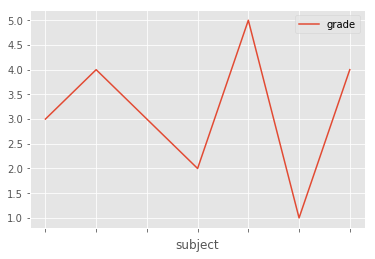

In [46]:
grades.plot(y='grade')

Az oszlopdiagramnak több értelme lenne:

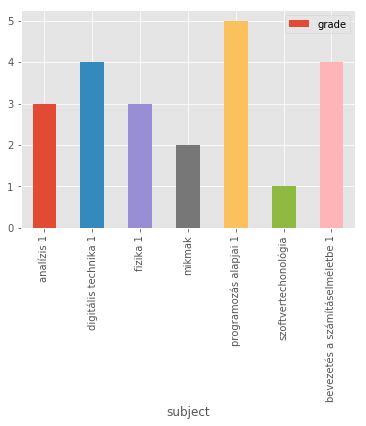

In [47]:
grades.plot(y='grade', kind='bar')

Nem adtuk meg az x tengelyt, ekkor automatikusan a DataFrame indexét használja, ami ebben az esetben a tárgyakat jelenti.

Ábrázolhatnánk félév szerint is egy scatter ploton.

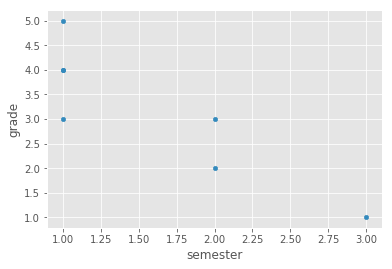

In [48]:
grades.plot(x='semester', y='grade', kind='scatter')

## Amire érdemes figyelni (GOTCHAs)

### Minden művelet új DataFrame-et ad vissza

Szinte minden művelet alapértelmezetten egy új DataFrame-mel tér vissza, nem módosítja a paramétereit. Ezt el kell tárolnunk, ha használni akarjuk.

### Egy cellában az utolsó kifejezés visszatérési értéke kiíródik, de a többi nem

Ha a többit is szeretnénk kiírni, használjuk a print függvényt.